In [6]:
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
%matplotlib ipympl

In [3]:
x = [] # iterations
y = [] # current CPU load
z = [] # current RAM load
i = 0

In [4]:
user = 'dan' 
refresh_freq = 1 # seconds (frequency of the graph refreshing)

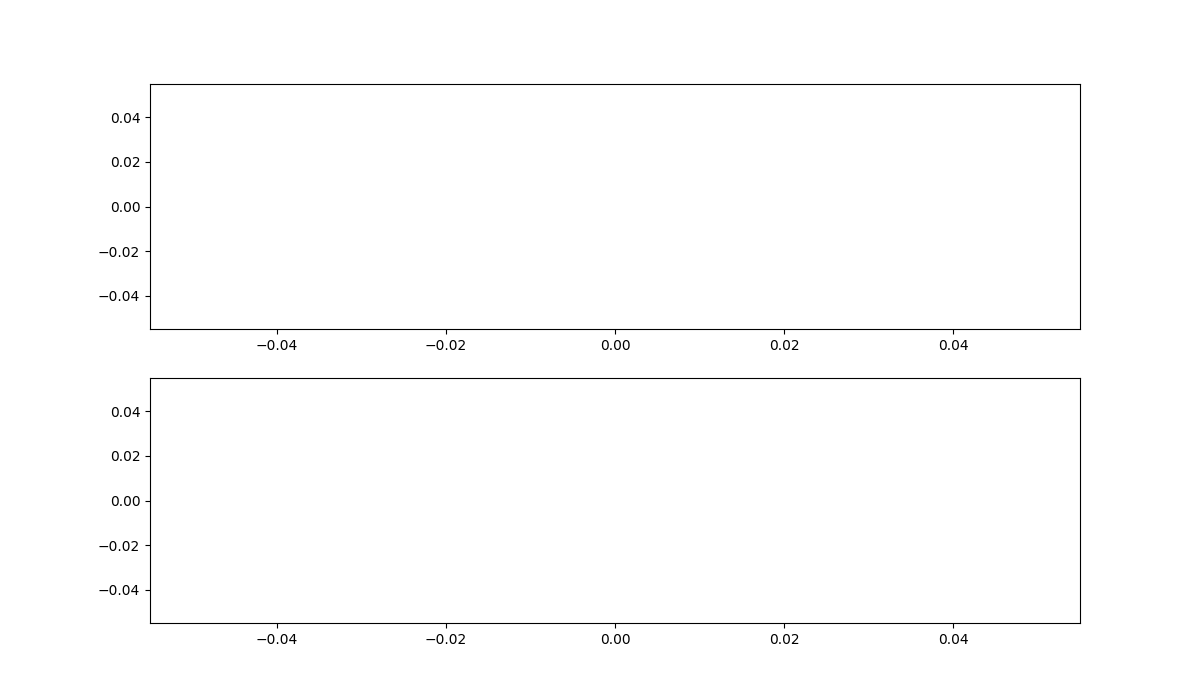

In [7]:
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
graph_cpu, = ax1.plot(x, y, 'g-') # CPU plot
graph_ram, = ax2.plot(x, z, 'b-') # RAM plot

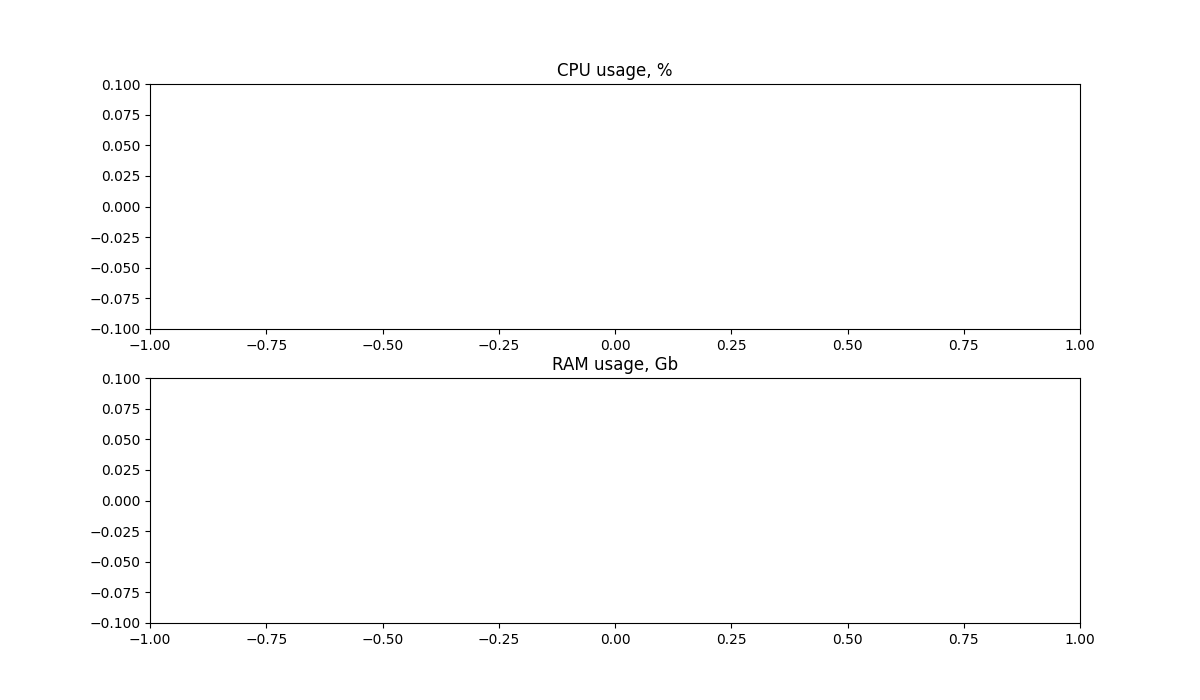

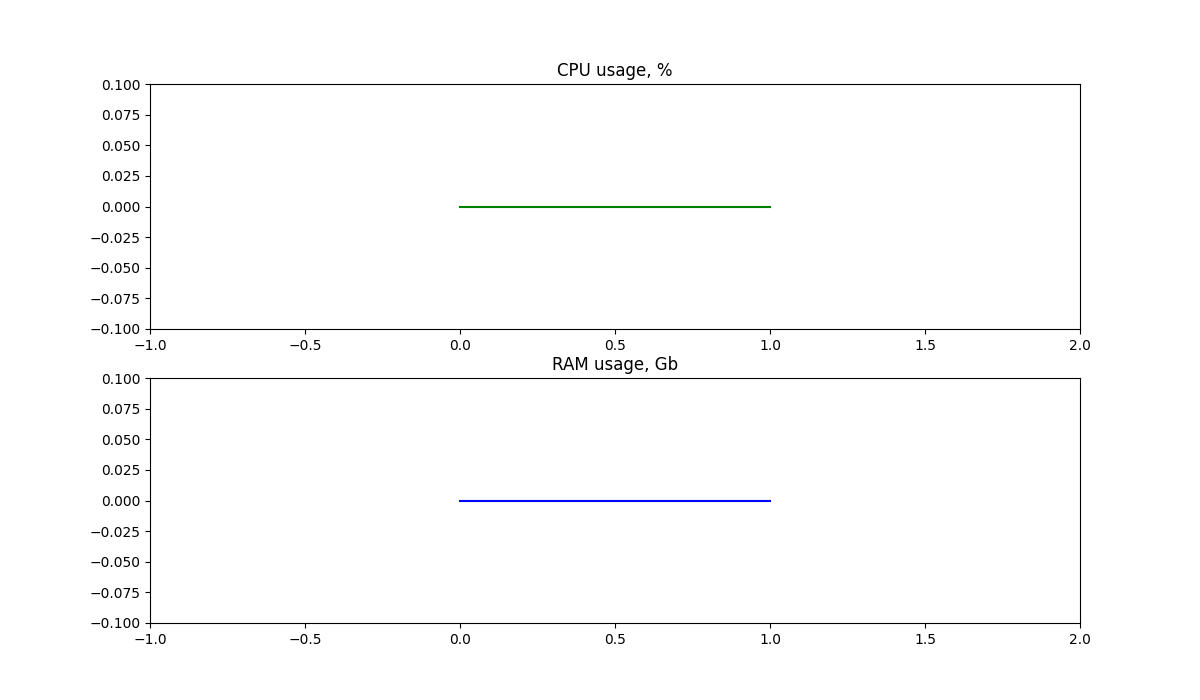

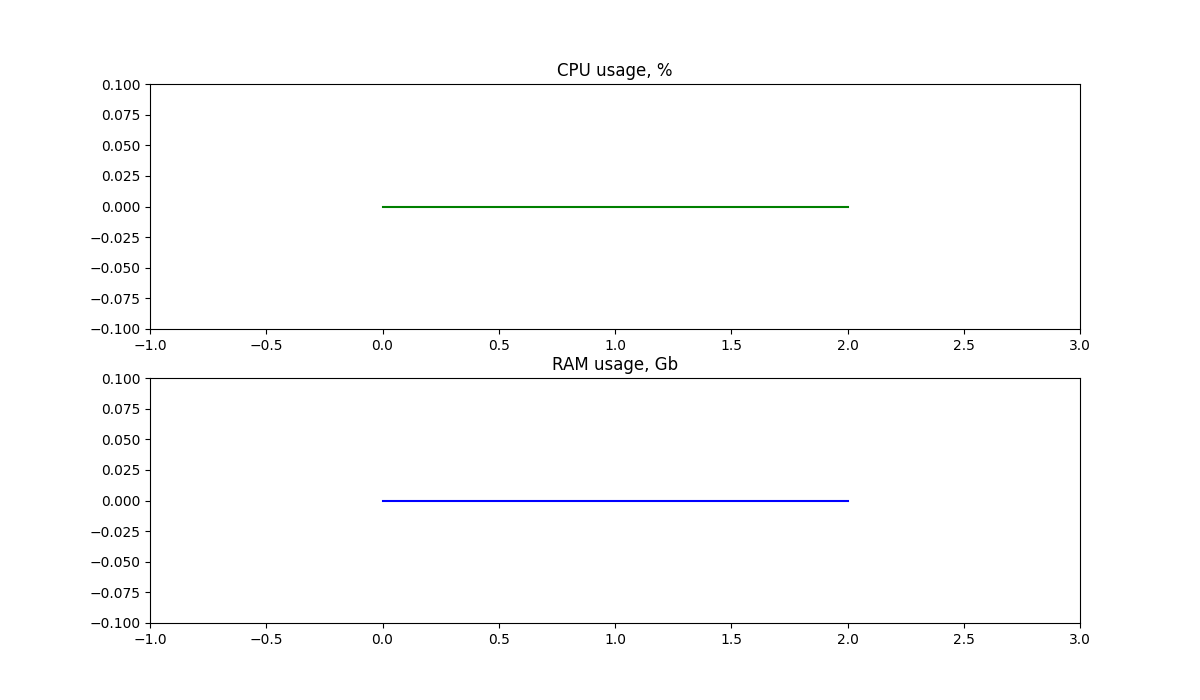

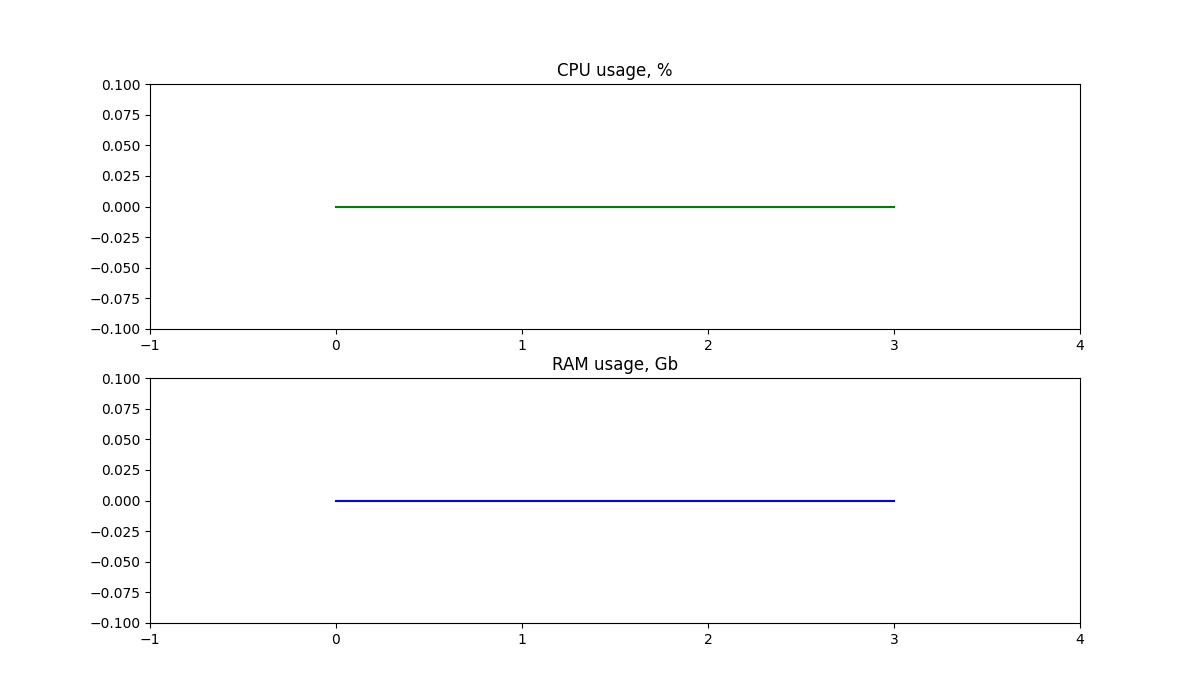

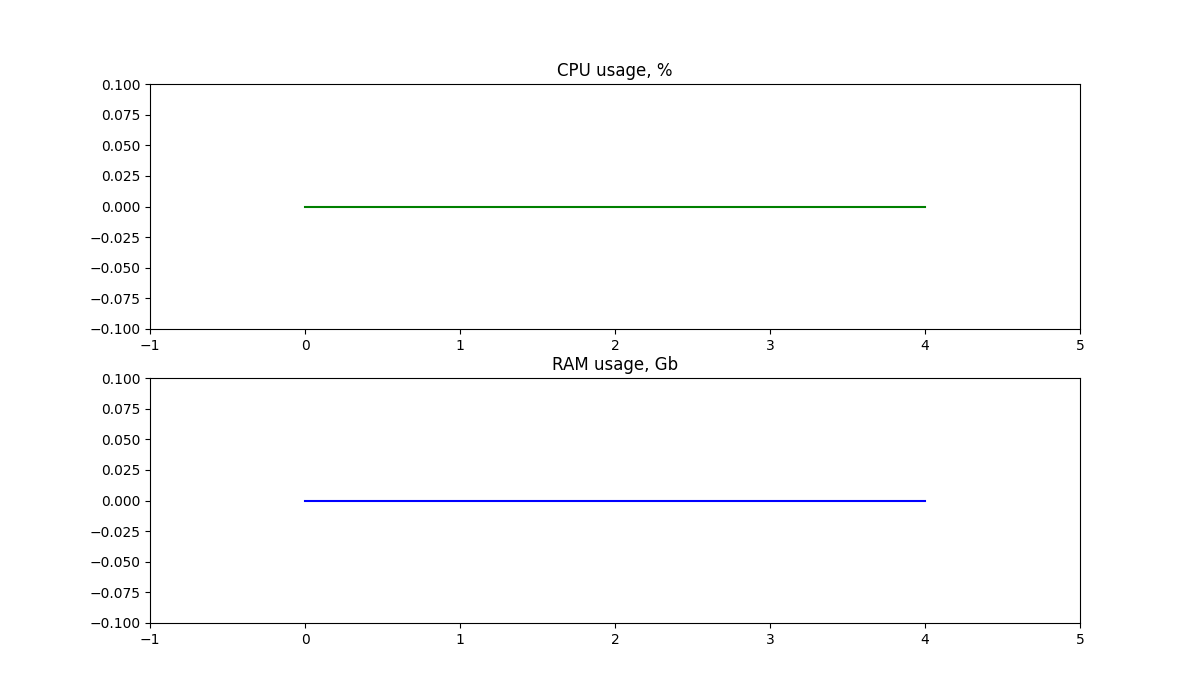

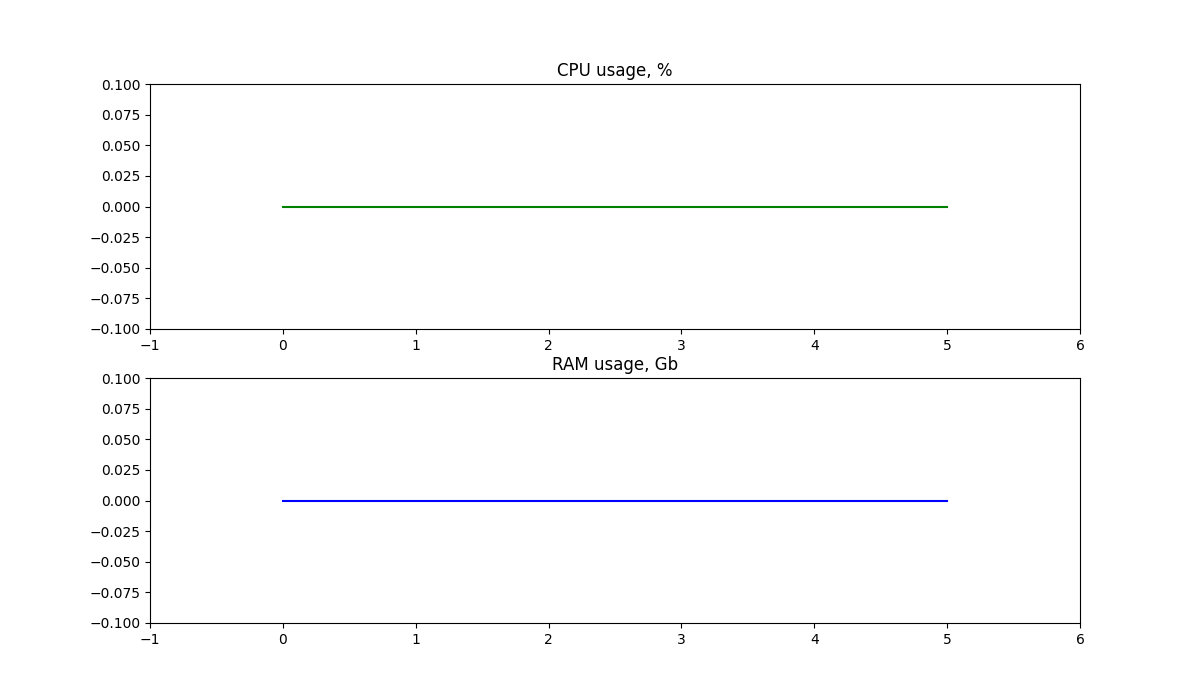

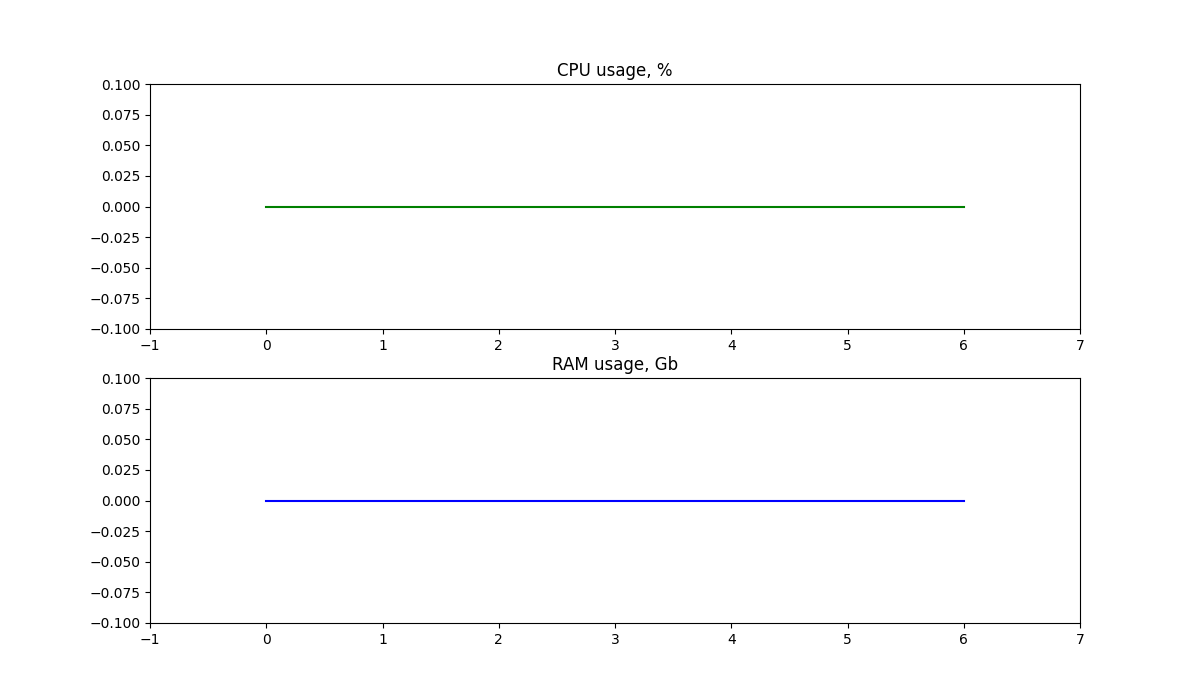

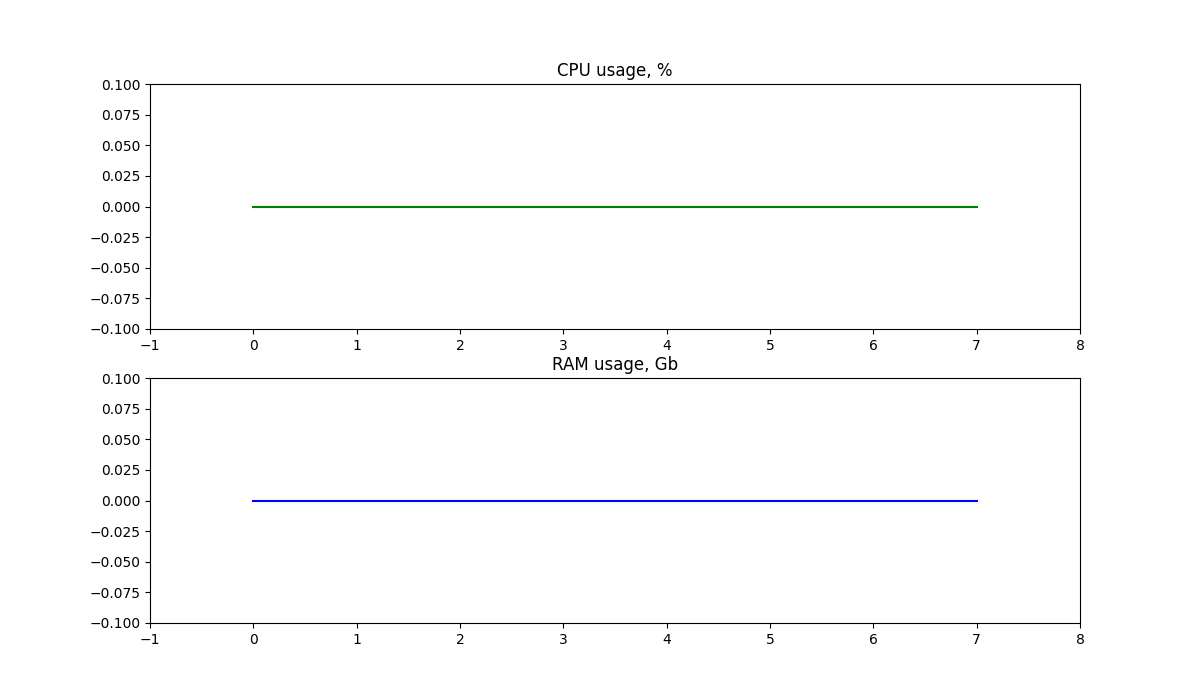

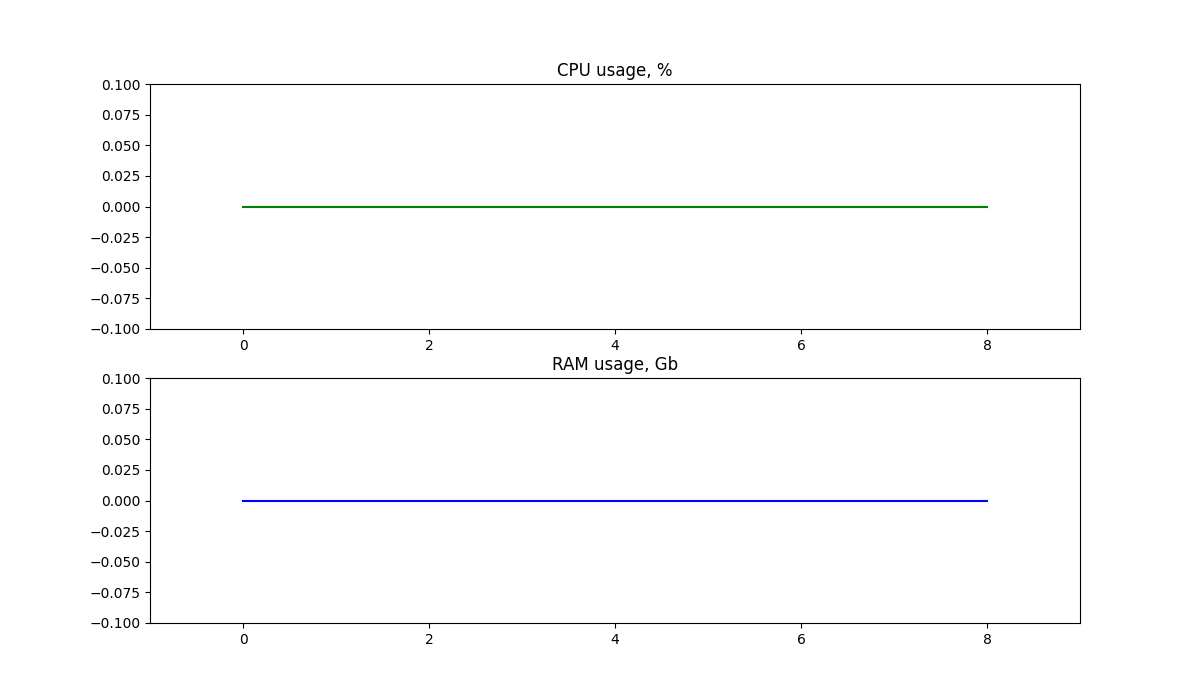

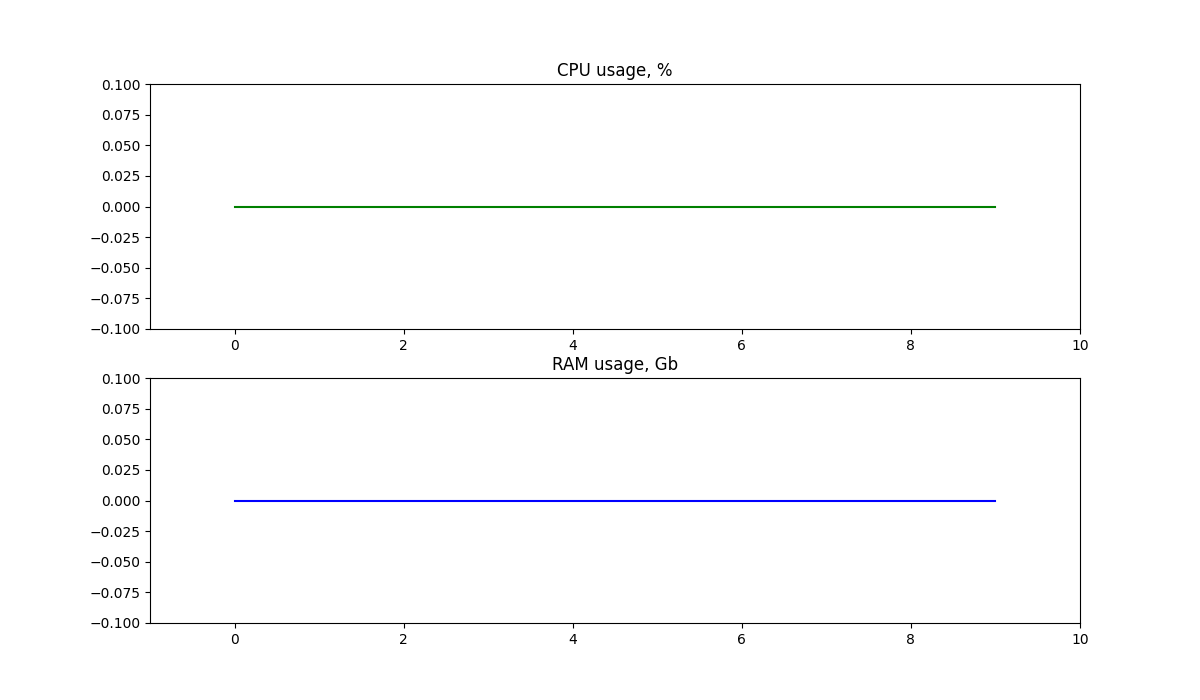

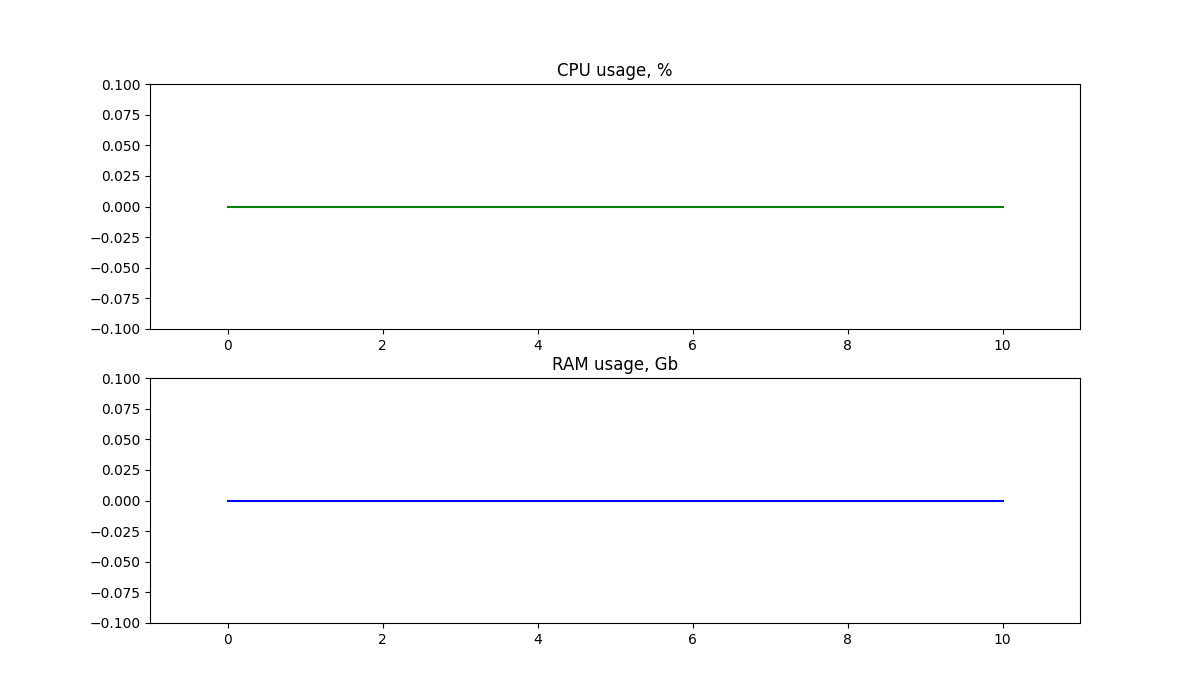

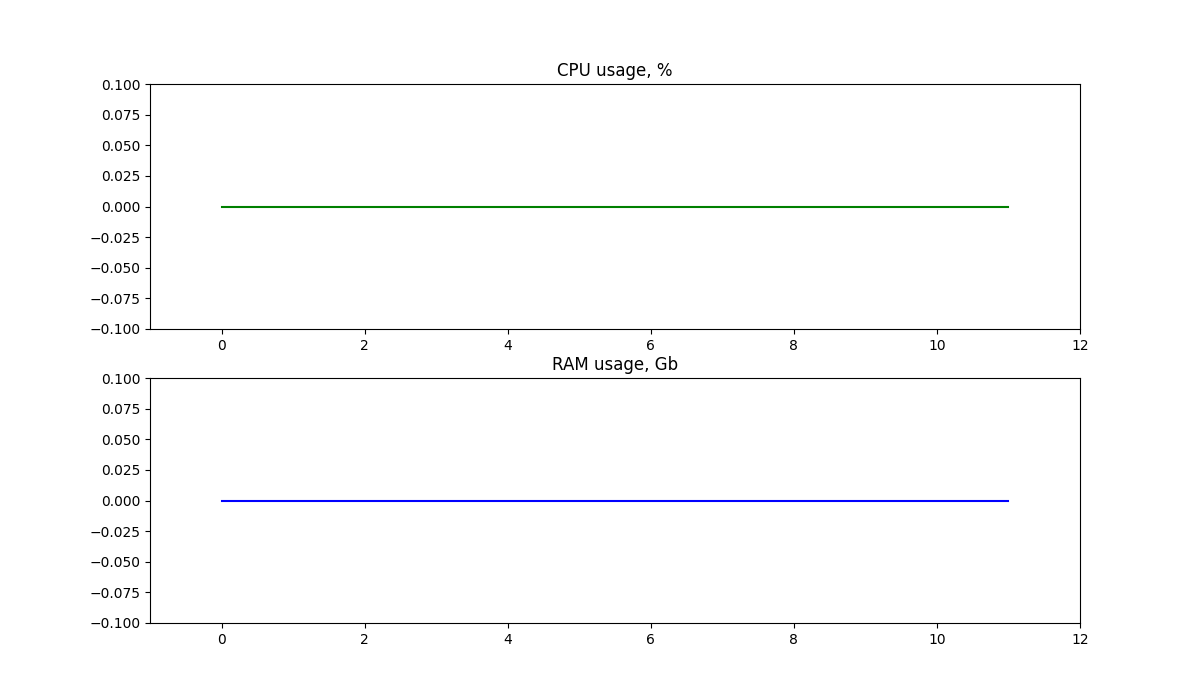

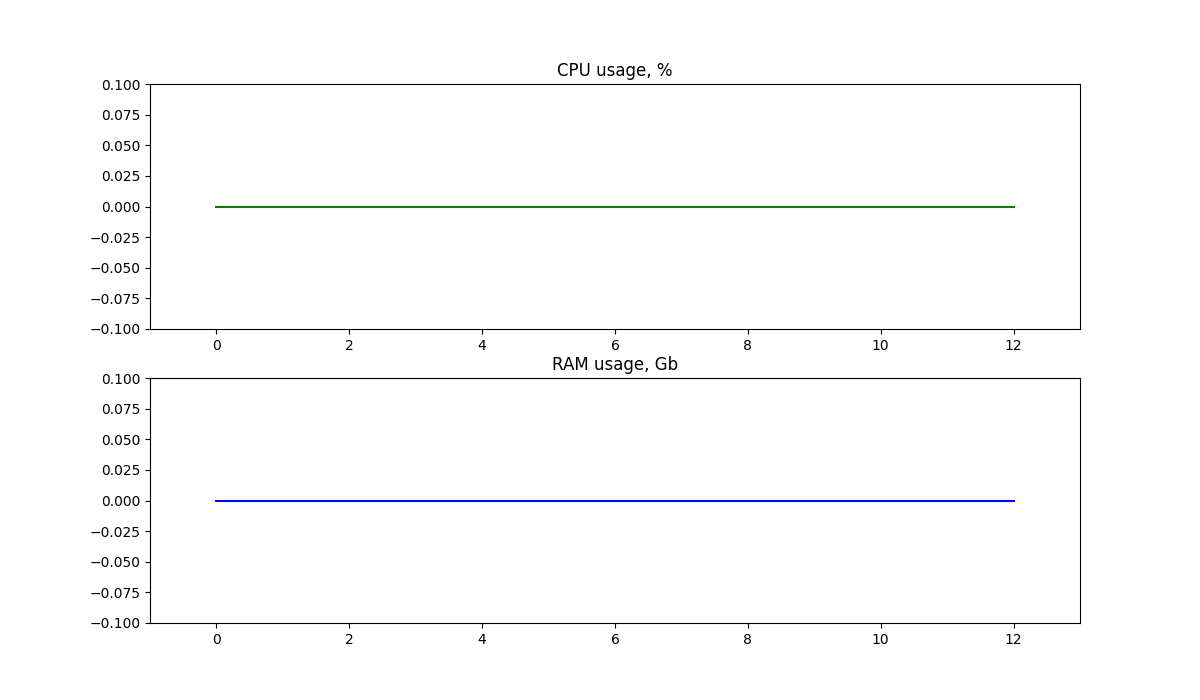

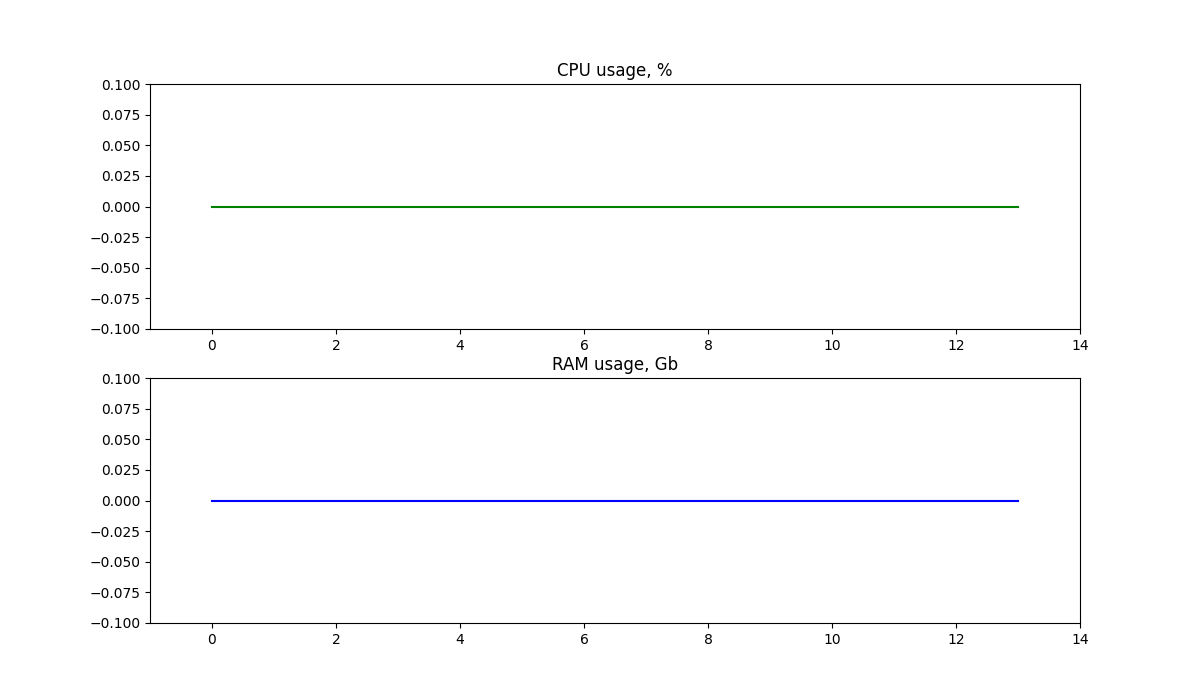

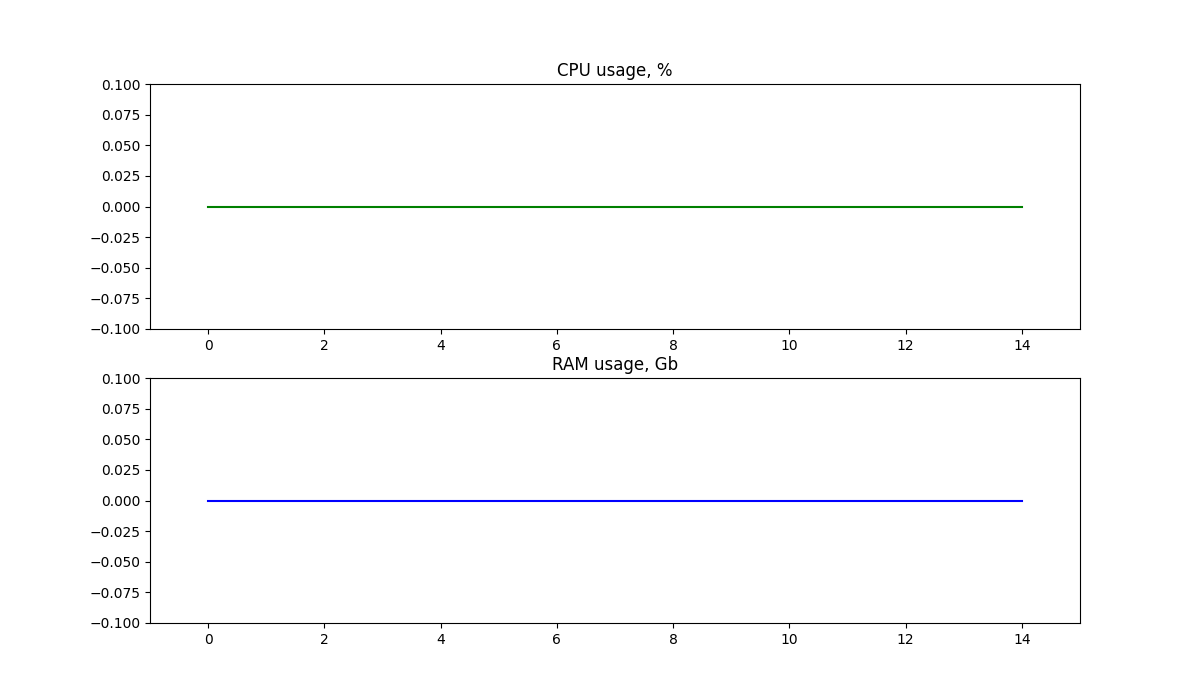

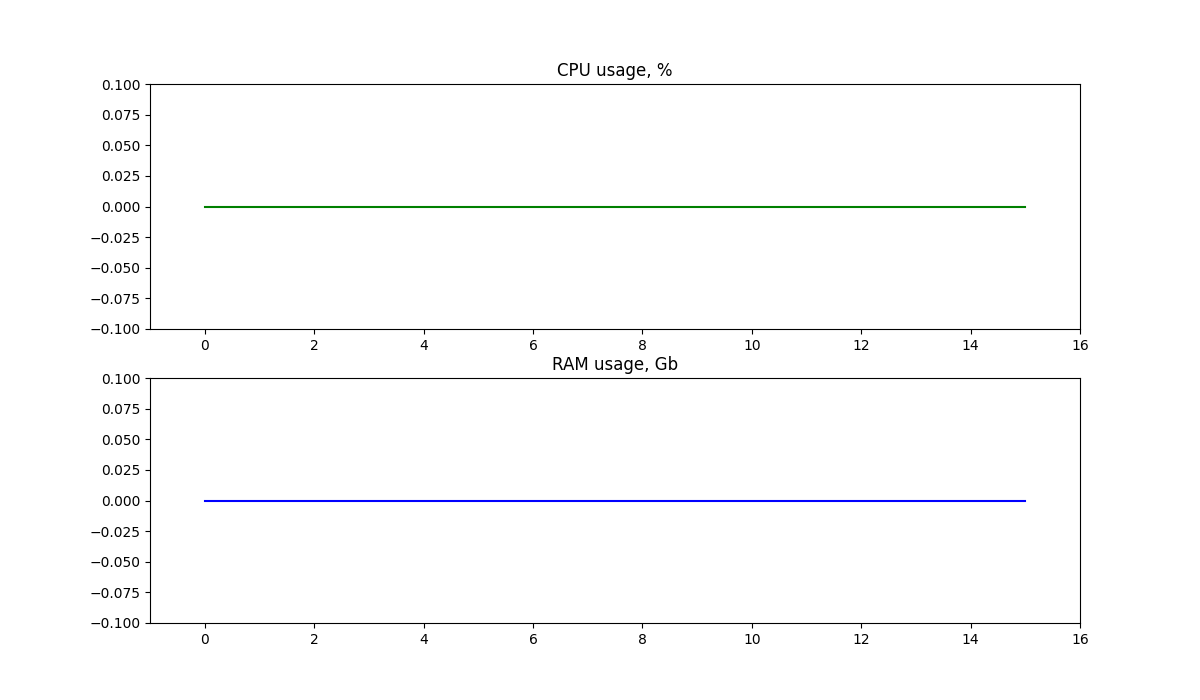

In [ ]:
zeros = 0
while zeros < 10:
    x.append(i)
    vals_cpu = []
    vals_ram = []
    vals_cpu.append(sum([p.cpu_percent() for p in psutil.process_iter() if p.username() == user]))
    vals_ram.append(sum([p.memory_info()[1]/(2.**30) for p in psutil.process_iter() if p.username() == user]))
    y.append(np.mean(vals_cpu))
    z.append(np.mean(vals_ram))
   
    # deal with while-loop stopping criterion
    if len(vals_cpu) < 2 or vals_cpu[-1] != vals_cpu[-2]:
        zeros = 0
    else:
        zeros += 1
   
    graph_cpu.set_xdata(x)
    graph_cpu.set_ydata(y)
    graph_ram.set_xdata(x)
    graph_ram.set_ydata(z)
 
    ax1.set_xlim((-1, i+1))
    ax2.set_xlim((-1, i+1))
    ax1.set_ylim((min(y)-0.1, max(y)+0.1))
    ax2.set_ylim((min(z)-0.1, max(z)+0.1))
    ax1.set_title('CPU usage, %')
    ax2.set_title('RAM usage, Gb')
 
    fig.canvas.draw()
    plt.pause(refresh_freq)
    i += 1